<a href="https://colab.research.google.com/github/le3212/colab-homework0-/blob/main/0505HW0%E7%AC%AC%E4%B8%80%E5%B0%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L2 誤差: 2.016266e-14


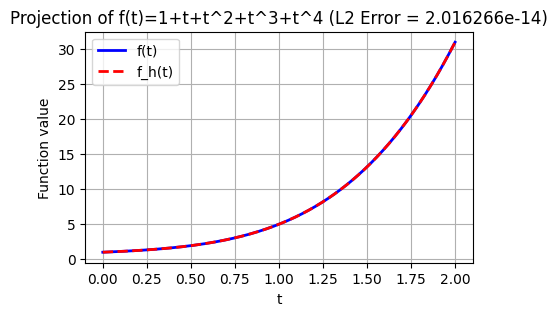

In [ ]:
# HW0 改進版：投影 f(t)=1+t+t^2+t^3+t^4, t in [0,2]
# 使用 Python/Numpy 編寫

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 定義 gauleg 函數：生成高斯節點與權重
def gauss_legendre(n):
    from numpy.polynomial.legendre import leggauss
    x, w = leggauss(n)
    return x, w

# 定義 legtable 函數：計算勒讓德多項式值
def legendre_polynomial_table(x, k):
    P = np.zeros((k + 1, len(x)))
    P[0, :] = 1
    if k > 0:
        P[1, :] = x
    for n in range(2, k + 1):
        P[n, :] = ((2 * n - 1) * x * P[n - 1, :] - (n - 1) * P[n - 2, :]) / n
    return P

# 設定參數
a = 0  # 定義積分區間起點
b = 2  # 定義積分區間終點
N = 32  # 子區間數
h = (b - a) / N  # 每個子區間長度
k = 6  # 投影多項式最高次數
m = k + 2  # 高斯積分節點數

# 定義函數 f(t)
f = lambda t: 1 + t + t**2 + t**3 + t**4

# 計算高斯節點與權重
x_gauss, w_gauss = gauss_legendre(m)

# 定義子區間的端點
t_nodes = np.linspace(a, b, N + 1)

# 預計算每個子區間的投影係數
coeffs = np.zeros((N, k + 1))
for n in range(N):
    t_left = t_nodes[n]
    t_right = t_nodes[n + 1]
    t_quad = (h / 2) * x_gauss + (t_left + t_right) / 2
    f_quad = f(t_quad)
    P = legendre_polynomial_table(x_gauss, k)
    for i in range(k + 1):
        I = np.sum(w_gauss * f_quad * P[i, :])
        coeffs[n, i] = (2 * i + 1) / 2 * I

# 建構投影函數 f_h(t)
npts = 1000
t_fine = np.linspace(a, b, npts)
f_h_vals = np.zeros_like(t_fine)
for n in range(N):
    t_left = t_nodes[n]
    t_right = t_nodes[n + 1]
    idx = (t_fine >= t_left) & (t_fine <= t_right)
    t_seg = t_fine[idx]
    s_seg = (2 * t_seg - (t_left + t_right)) / (t_right - t_left)
    P_seg = legendre_polynomial_table(s_seg, k)
    f_seg = np.zeros_like(t_seg)
    for j in range(k + 1):
        f_seg += coeffs[n, j] * P_seg[j, :]
    f_h_vals[idx] = f_seg

# 計算 L2 誤差
L2_error = np.sqrt(np.trapezoid((f(t_fine) - f_h_vals)**2, t_fine))
print(f"L2 誤差: {L2_error:.6e}")
# 繪圖
plt.figure(figsize=(5, 3))
plt.plot(t_fine, f(t_fine), 'b-', label='f(t)', linewidth=2)
plt.plot(t_fine, f_h_vals, 'r--', label='f_h(t)', linewidth=2)
plt.xlabel('t')
plt.ylabel('Function value')
plt.title(f"Projection of f(t)=1+t+t^2+t^3+t^4 (L2 Error = {L2_error:.6e})")
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# 1. 設定參數範圍
ks = [2, 4, 6]  # 多項式次數
Ns = [2, 4, 8, 16, 32, 64]  # 分割區間數
errors = np.zeros((len(ks), len(Ns)))  # 儲存誤差
orders = np.zeros((len(ks), len(Ns) - 1))  # 儲存收斂階數

In [ ]:
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        # 根據當前的 k 和 N 計算 L2 誤差
        h = (b - a) / N
        t_nodes = np.linspace(a, b, N + 1)
        coeffs = np.zeros((N, k + 1))

        for n in range(N):
            t_left = t_nodes[n]
            t_right = t_nodes[n + 1]
            t_quad = (h / 2) * x_gauss + (t_left + t_right) / 2
            f_quad = f(t_quad)
            P = legtable(x_gauss, k)
            for m in range(k + 1):
                I = np.sum(w_gauss * f_quad * P[m, :])
                coeffs[n, m] = (2 * m + 1) / 2 * I

        # 投影函數
        f_h_vals = np.zeros_like(t_fine)
        for n in range(N):
            t_left = t_nodes[n]
            t_right = t_nodes[n + 1]
            idx = (t_fine >= t_left) & (t_fine <= t_right)
            t_seg = t_fine[idx]
            s_seg = (2 * t_seg - (t_left + t_right)) / (t_right - t_left)
            P_seg = legtable(s_seg, k)
            f_seg = np.zeros_like(t_seg)
            for m in range(k + 1):
                f_seg += coeffs[n, m] * P_seg[m, :]
            f_h_vals[idx] = f_seg

        # 計算誤差
        L2_error = np.sqrt(np.trapezoid((f(t_fine) - f_h_vals) ** 2, t_fine))
        errors[i, j] = L2_error


In [ ]:
for i in range(len(ks)):
    for j in range(len(Ns) - 1):
        orders[i, j] = np.log2(errors[i, j] / errors[i, j + 1])


In [ ]:
# 顯示誤差表
error_df = pd.DataFrame(errors, columns=Ns, index=[f"Degree {k}" for k in ks])
print("誤差表 (L2 Error):")
print(error_df)

# 顯示收斂階數表
order_df = pd.DataFrame(orders, columns=Ns[:-1], index=[f"Degree {k}" for k in ks])
print("\n收斂階數表 (Order):")
print(order_df)


誤差表 (L2 Error):
                    2             4             8             16  \
Degree 2  1.440844e-01  1.829615e-02  2.295504e-03  2.873890e-04   
Degree 4  2.628176e-14  2.277110e-14  2.043571e-14  1.956112e-14   
Degree 6  2.727884e-14  2.380724e-14  2.158056e-14  2.146430e-14   

                    32            64  
Degree 2  3.593670e-05  4.492390e-06  
Degree 4  1.935371e-14  1.957050e-14  
Degree 6  2.090606e-14  2.114578e-14  

收斂階數表 (Order):
                2         4         8         16        32
Degree 2  2.977302  2.994657  2.997734  2.999475  2.999903
Degree 4  0.206858  0.156112  0.063103  0.015379 -0.016071
Degree 6  0.196382  0.141668  0.007794  0.038017 -0.016448
